In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None,
              'display.max_rows', None)

In [4]:
# Importing LEBRON data

column_names = ['Season', 'Age',	'Player',	'Team(s)',	'Minutes',	'Offense Position',	
                'Offensive Archetype',	'Defensive Role',	'LEBRON WAR',	
                'LEBRON',	'O-LEBRON',	'D-LEBRON']

lebron = pd.read_csv('/content/lebron_allyears.tsv', sep='\t', header=None,
                     names=column_names)

lebron.head()

,Season,Age,Player,Team(s),Minutes,Offense Position,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON
1,2013-14,25,Kevin Durant,OKC,3122,SF,Shot Creator,Low Activity,18.5,6.77,6.33,0.44
2,2015-16,31,LeBron James,CLE,2709,SF,Shot Creator,Helper,16.1,6.83,5.30,1.54
3,2015-16,28,Stephen Curry,GSW,2700,PG,Primary Ball Handler,Point of Attack,16.0,6.77,6.75,0.03
4,2018-19,29,James Harden,HOU,2867,PG,Shot Creator,Helper,15.8,6.31,6.83,-0.52
5,2015-16,27,Russell Westbrook,OKC,2750,PG,Shot Creator,Point of Attack,15.7,6.42,5.89,0.53


In [5]:
# Checking number of rows and columns
lebron.shape

(4658, 12)

In [6]:
# Formatting the year-season correctly
lebron['Season_end_year'] = lebron['Season'].apply(lambda x: '20' + x[-2:]).astype(int)

In [7]:
lebron.head()

,Season,Age,Player,Team(s),Minutes,Offense Position,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,Season_end_year
1,2013-14,25,Kevin Durant,OKC,3122,SF,Shot Creator,Low Activity,18.5,6.77,6.33,0.44,2014
2,2015-16,31,LeBron James,CLE,2709,SF,Shot Creator,Helper,16.1,6.83,5.30,1.54,2016
3,2015-16,28,Stephen Curry,GSW,2700,PG,Primary Ball Handler,Point of Attack,16.0,6.77,6.75,0.03,2016
4,2018-19,29,James Harden,HOU,2867,PG,Shot Creator,Helper,15.8,6.31,6.83,-0.52,2019
5,2015-16,27,Russell Westbrook,OKC,2750,PG,Shot Creator,Point of Attack,15.7,6.42,5.89,0.53,2016


In [8]:
# Checking datatypes and nulls
lebron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4658 entries, 1 to 4658
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               4658 non-null   object 
 1   Age                  4658 non-null   int64  
 2   Player               4658 non-null   object 
 3   Team(s)              4658 non-null   object 
 4   Minutes              4658 non-null   int64  
 5   Offense Position     4658 non-null   object 
 6   Offensive Archetype  4658 non-null   object 
 7   Defensive Role       4658 non-null   object 
 8   LEBRON WAR           4658 non-null   float64
 9   LEBRON               4658 non-null   float64
 10  O-LEBRON             4658 non-null   float64
 11  D-LEBRON             4658 non-null   float64
 12  Season_end_year      4658 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 509.5+ KB


In [9]:
# Numbers make sense
lebron.describe()

,Age,Minutes,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,Season_end_year
count,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000,4658.000000
mean,26.482611,1114.153070,1.762344,-0.547812,-0.510902,-0.036951,2018.156934
std,4.244642,822.068786,2.648494,1.722335,1.425465,1.055968,2.592762
min,19.000000,1.000000,-3.400000,-5.140000,-4.350000,-3.620000,2014.000000
25%,23.000000,334.000000,0.100000,-1.680000,-1.440000,-0.670000,2016.000000
50%,26.000000,1050.500000,0.700000,-0.830000,-0.705000,-0.120000,2018.000000
75%,29.000000,1787.750000,2.500000,0.280000,0.100000,0.500000,2020.000000
max,43.000000,3125.000000,18.500000,7.830000,6.830000,5.080000,2022.000000


In [10]:
#Checking for empty values

lebron.apply(lambda x: x == '').sum()

Season                 0
Age                    0
Player                 0
Team(s)                0
Minutes                0
Offense Position       0
Offensive Archetype    0
Defensive Role         0
LEBRON WAR             0
LEBRON                 0
O-LEBRON               0
D-LEBRON               0
Season_end_year        0
dtype: int64

In [11]:
# Checking for duplicated rows
lebron.duplicated().sum()

0

In [12]:
# The combination of the columns player and season
# should give us a unique key for the table
lebron.groupby(['Player', 'Season'])['Player'].\
                     transform(lambda x: x.count() > 1).sum()

0

In [13]:
# Only one per group here

lebron_grouped = lebron.groupby(['Player', 'Season']).size().reset_index()

lebron_grouped.rename(columns={0: 'size'}, inplace=True)

lebron_grouped.loc[lebron_grouped['size'] > 1, :]

,Player,Season,size


In [14]:
# Importing RPM data
rpm = pd.read_csv('/content/RPM_all_seasons.csv')

rpm.drop(columns=['Unnamed: 0', 'RK'], inplace=True)

rpm.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,year
0,"LeBron James, SF",MIA,76,37.9,6.32,1.26,7.58,19.41,2013
1,"Chris Paul, PG",LAC,70,33.4,5.10,1.40,6.50,14.06,2013
2,"Vince Carter, G",DAL,81,25.8,3.17,1.90,5.07,11.01,2013
3,"Kevin Durant, PF",OKC,81,38.5,4.28,0.65,4.93,15.90,2013
4,"Mike Conley, PG",MEM,80,34.5,1.39,3.53,4.92,13.27,2013


In [15]:
# Getting the name and position in separate columns
rpm['POSITION'] = rpm['NAME'].apply(lambda x: x.split(', ')[1])
rpm['NAME'] = rpm['NAME'].apply(lambda x: x.split(', ')[0])

rpm.head()

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,year,POSITION
0,LeBron James,MIA,76,37.9,6.32,1.26,7.58,19.41,2013,SF
1,Chris Paul,LAC,70,33.4,5.10,1.40,6.50,14.06,2013,PG
2,Vince Carter,DAL,81,25.8,3.17,1.90,5.07,11.01,2013,G
3,Kevin Durant,OKC,81,38.5,4.28,0.65,4.93,15.90,2013,PF
4,Mike Conley,MEM,80,34.5,1.39,3.53,4.92,13.27,2013,PG


In [16]:
# For every dataset, how do they handle players changing teams
# mid-season?

rpm.loc[rpm.NAME == 'Lou Amundson', :]

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,year,POSITION
323,Lou Amundson,MIN/CHI/NO,39,9.5,-3.77,1.03,-2.73,-0.05,2013,PF
801,Lou Amundson,NO/CHI,19,9.7,-2.96,-0.81,-3.77,-0.12,2014,PF
1154,Lou Amundson,CLE/NY,53,17.7,-2.03,-0.36,-2.39,0.19,2015,PF
1692,Lou Amundson,NY,29,7.0,-3.43,-0.50,-3.93,-0.23,2016,PF


In [17]:
rpm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      5024 non-null   object 
 1   TEAM      5024 non-null   object 
 2   GP        5024 non-null   int64  
 3   MPG       5024 non-null   float64
 4   ORPM      5024 non-null   float64
 5   DRPM      5024 non-null   float64
 6   RPM       5024 non-null   float64
 7   WINS      5024 non-null   float64
 8   year      5024 non-null   int64  
 9   POSITION  5024 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 392.6+ KB


In [18]:
rpm.apply(lambda x: x == '').sum()

NAME        0
TEAM        0
GP          0
MPG         0
ORPM        0
DRPM        0
RPM         0
WINS        0
year        0
POSITION    0
dtype: int64

In [19]:
rpm.describe()

,GP,MPG,ORPM,DRPM,RPM,WINS,year
count,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000,5024.000000
mean,47.443471,19.492974,-0.765418,-0.402759,-1.168153,1.623551,2018.135748
std,24.460534,8.959221,1.887071,1.687498,2.376440,3.135201,3.130051
min,1.000000,2.000000,-13.150000,-6.170000,-10.680000,-7.310000,2013.000000
25%,27.000000,12.400000,-1.982500,-1.460000,-2.630000,-0.020000,2015.000000
50%,51.000000,18.900000,-0.880000,-0.440000,-1.330000,0.460000,2018.000000
75%,69.000000,26.700000,0.242500,0.642500,0.060000,2.180000,2021.000000
max,83.000000,43.500000,12.030000,8.000000,11.780000,27.010000,2023.000000


In [20]:
rpm.loc[rpm.duplicated(), :]

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,year,POSITION
4065,Tre Jones,SA,37,7.3,-1.82,-1.76,-3.58,-0.43,2021,PG


In [21]:
# Might need to delete row 4064 or 4065
to_drop = rpm.loc[rpm.duplicated(), :].index

rpm.drop(index=to_drop, inplace=True)

In [22]:
rpm.duplicated().sum()

0

In [23]:
rpm.loc[rpm.NAME == 'Scottie Barnes', :]

,NAME,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,year,POSITION
4686,Scottie Barnes,TOR,34,34.0,-1.53,1.82,0.29,2.87,2023,SF


In [24]:
bpm = pd.read_csv('/content/bpm_bballref.csv')

bpm.drop(columns=['Unnamed: 0', 'Rk', 'Unnamed: 19', 'Unnamed: 24'],
         inplace=True)

bpm.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
0,Quincy Acy,PF,22,TOR,29,342,15.9,.632,.027,.507,10.3,16.6,13.4,5.2,2.0,3.5,15.6,14.7,0.7,0.4,1.1,.157,-1.0,1.0,0.1,0.2,2013
1,Jeff Adrien,PF,26,CHA,52,713,13.4,.493,.012,.595,10.6,21.2,15.7,8.3,1.3,3.1,13.1,15.6,0.5,0.4,1.0,.064,-2.1,-0.9,-3.0,-0.2,2013
2,Arron Afflalo,SF,27,ORL,64,2307,13.0,.527,.265,.246,1.4,10.3,5.8,14.6,0.9,0.4,12.1,22.5,1.5,0.5,2.0,.042,-1.1,-1.8,-2.9,-0.5,2013
3,Josh Akognon,PG,26,DAL,3,9,15.3,.625,.500,.000,0.0,12.1,6.2,19.4,0.0,0.0,0.0,20.3,0.0,0.0,0.0,.196,-3.1,0.1,-3.0,0.0,2013
4,Cole Aldrich,C,24,TOT,45,388,11.1,.563,.000,.250,8.7,26.7,17.7,3.4,0.7,4.6,20.6,12.7,0.1,0.4,0.6,.070,-3.5,0.6,-2.9,-0.1,2013


In [25]:
bpm.drop(index=bpm.loc[bpm.Age == 'Age', :].index,
         inplace=True)

bpm.duplicated().sum()

0

In [26]:
num_cols = [c for c in bpm.columns if c not in ['Player', 'Pos', 'Tm']]

bpm[num_cols] = bpm[num_cols].apply(pd.to_numeric)

In [27]:
# Some crazy numbers here, we have to decide
# a total minutes cutoff
bpm.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,year
count,7042.000000,7042.000000,7042.000000,7041.000000,6991.000000,6989.000000,6989.00000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,7041.000000,6997.000000,7041.00000,7042.000000,7042.000000,7042.000000,7041.000000,7042.000000,7042.000000,7042.000000,7042.000000,7042.000000
mean,26.216132,42.046152,949.000852,12.611050,0.526051,0.339471,0.26432,5.088752,14.903011,9.997571,12.969777,1.551513,1.682332,13.123510,18.45654,1.002925,0.949631,1.954189,0.070348,-1.578827,-0.242502,-1.821514,0.453408,2018.117864
std,4.162804,25.611210,795.913650,6.986629,0.112561,0.228111,0.23387,5.111692,7.448033,5.369831,9.330520,1.127296,1.812517,6.923143,5.71290,1.703943,0.997939,2.484758,0.113228,4.637001,2.026952,5.803024,1.104891,3.102385
min,19.000000,1.000000,0.000000,-45.200000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-3.300000,-0.500000,-2.100000,-1.231000,-52.400000,-31.100000,-81.400000,-2.000000,2013.000000
25%,23.000000,19.000000,232.000000,9.400000,0.491500,0.161000,0.15100,1.900000,10.100000,6.200000,6.700000,1.000000,0.500000,9.700000,14.70000,0.000000,0.200000,0.100000,0.033000,-3.200000,-1.100000,-3.500000,-0.100000,2015.000000
50%,26.000000,41.000000,767.500000,12.600000,0.537000,0.352000,0.23100,3.400000,13.600000,8.700000,10.200000,1.400000,1.200000,12.400000,17.90000,0.400000,0.600000,1.100000,0.079000,-1.300000,-0.200000,-1.400000,0.100000,2018.000000
75%,29.000000,66.000000,1536.750000,16.000000,0.578000,0.497000,0.33000,7.300000,18.800000,12.900000,17.400000,1.900000,2.300000,15.600000,21.80000,1.500000,1.400000,2.900000,0.120000,0.300000,0.700000,0.400000,0.600000,2021.000000
max,43.000000,83.000000,3167.000000,133.800000,1.500000,1.000000,6.00000,100.000000,100.000000,62.800000,100.000000,25.000000,30.000000,100.000000,54.60000,14.800000,6.600000,19.300000,2.712000,199.400000,42.700000,242.200000,9.900000,2023.000000


In [28]:
# Players traded mid-season?
# Filter the dataset and choose the 'TOT' row
# for players that played for more than one team
# on a given season

bpm['Traded_midseason'] = bpm.groupby(['Player', 'year'])['Player'].\
                          transform(lambda x: 'Yes' if x.count() > 1 else 'No')

In [29]:
rows_to_drop = bpm.loc[(bpm.Traded_midseason == 'Yes') & (bpm.Tm != 'TOT'), :].index

bpm.drop(index=rows_to_drop, inplace=True)

In [30]:
bpm.loc[(bpm.Traded_midseason == 'Yes'), :].shape

(675, 28)

In [31]:
bpm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5635 entries, 0 to 7317
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            5635 non-null   object 
 1   Pos               5635 non-null   object 
 2   Age               5635 non-null   int64  
 3   Tm                5635 non-null   object 
 4   G                 5635 non-null   int64  
 5   MP                5635 non-null   int64  
 6   PER               5634 non-null   float64
 7   TS%               5603 non-null   float64
 8   3PAr              5602 non-null   float64
 9   FTr               5602 non-null   float64
 10  ORB%              5634 non-null   float64
 11  DRB%              5634 non-null   float64
 12  TRB%              5634 non-null   float64
 13  AST%              5634 non-null   float64
 14  STL%              5634 non-null   float64
 15  BLK%              5634 non-null   float64
 16  TOV%              5607 non-null   float64


In [32]:
bpm.isnull().sum()

Player               0
Pos                  0
Age                  0
Tm                   0
G                    0
MP                   0
PER                  1
TS%                 32
3PAr                33
FTr                 33
ORB%                 1
DRB%                 1
TRB%                 1
AST%                 1
STL%                 1
BLK%                 1
TOV%                28
USG%                 1
OWS                  0
DWS                  0
WS                   0
WS/48                1
OBPM                 0
DBPM                 0
BPM                  0
VORP                 0
year                 0
Traded_midseason     0
dtype: int64

In [33]:
bpm.apply(lambda x: x == '').sum()

Player              0
Pos                 0
Age                 0
Tm                  0
G                   0
MP                  0
PER                 0
TS%                 0
3PAr                0
FTr                 0
ORB%                0
DRB%                0
TRB%                0
AST%                0
STL%                0
BLK%                0
TOV%                0
USG%                0
OWS                 0
DWS                 0
WS                  0
WS/48               0
OBPM                0
DBPM                0
BPM                 0
VORP                0
year                0
Traded_midseason    0
dtype: int64

In [34]:
bpm.groupby(['Player', 'year'])['Player'].transform(lambda x: x.count() > 1).sum()

0

In [35]:
# EPM and RAPTOR left

In [36]:
raptor = pd.read_csv('/content/raptor.csv')

raptor.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,-4.275564,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,-1.341421,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,-4.970491,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,1.415548,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609


In [37]:
raptor.shape

(4685, 21)

In [38]:
raptor.columns

Index(['player_name', 'player_id', 'season', 'poss', 'mp',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total',
       'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')

In [39]:
cols_to_keep = ['player_name', 'season', 'poss', 'mp', 'raptor_offense',
                'raptor_defense', 'raptor_total', 'war_reg_season']

cols_to_drop = [c for c in raptor.columns if c not in cols_to_keep]

raptor.drop(columns=cols_to_drop, inplace=True)

In [40]:
raptor.head()

,player_name,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_reg_season
0,Alex Abrines,2017,2387,1135,0.543421,-1.144832,-0.601411,1.447708
1,Alex Abrines,2018,2546,1244,-0.020826,-1.502642,-1.523468,0.465912
2,Alex Abrines,2019,1279,588,-4.040157,1.885618,-2.154538,0.178167
3,Precious Achiuwa,2021,1581,749,-4.347596,0.954821,-3.392775,-0.246776
4,Precious Achiuwa,2022,3802,1892,-2.517372,2.144151,-0.373221,2.309611


In [41]:
raptor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_name     4685 non-null   object 
 1   season          4685 non-null   int64  
 2   poss            4685 non-null   int64  
 3   mp              4685 non-null   int64  
 4   raptor_offense  4685 non-null   float64
 5   raptor_defense  4685 non-null   float64
 6   raptor_total    4685 non-null   float64
 7   war_reg_season  4685 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 292.9+ KB


In [42]:
raptor.apply(lambda x: x == '').sum()

player_name       0
season            0
poss              0
mp                0
raptor_offense    0
raptor_defense    0
raptor_total      0
war_reg_season    0
dtype: int64

In [43]:
raptor.describe()

,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_reg_season
count,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000,4685.000000
mean,2018.168196,2443.001281,1186.706937,-1.278051,-0.334170,-1.612221,1.564623
std,2.597849,1850.813297,905.942172,4.119925,4.015186,5.840575,2.749270
min,2014.000000,2.000000,1.000000,-45.323308,-56.982520,-67.356001,-7.382978
25%,2016.000000,709.000000,341.000000,-2.685659,-1.769847,-3.511722,-0.098846
50%,2018.000000,2252.000000,1087.000000,-1.005402,-0.232389,-1.110777,0.538689
75%,2020.000000,3880.000000,1894.000000,0.517681,1.248538,1.086221,2.550723
max,2022.000000,8026.000000,3948.000000,53.228864,62.469205,72.622361,23.659318


In [44]:
raptor.duplicated().sum()

0

In [45]:
# Seems like it includes the total for players traded mid-season
raptor.loc[raptor.player_name == 'Lou Amundson', :]

,player_name,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_reg_season
97,Lou Amundson,2014,366,185,-4.896982,-0.561729,-5.458711,-0.241764
98,Lou Amundson,2015,1835,937,-3.319203,2.177566,-1.141637,0.779910
99,Lou Amundson,2016,407,204,-5.493576,2.348716,-3.144860,-0.041234


In [46]:
# These guarantees that each player has only one row of data for each season
raptor.groupby(['player_name', 'season'])['player_name'].transform(lambda x: x.count() > 1).sum()

0

In [47]:
# epm

epm = pd.read_csv('/content/epm values 14-22.csv')

epm.head()

,season,nba_id,player_name,pos,team,oepm,depm,epm,ewins
0,2022,203999,Nikola Jokic,C,DEN,7.40198,1.84912,9.25110,20.6523
1,2022,203954,Joel Embiid,C,PHI,5.90332,1.99300,7.89632,17.0182
2,2022,203507,Giannis Antetokounmpo,PF,MIL,6.15079,1.17268,7.32347,15.4754
3,2022,201939,Stephen Curry,PG,GSW,5.35352,1.79818,7.15170,15.2847
4,2022,201142,Kevin Durant,PF,BKN,5.17198,1.20203,6.37402,13.0461


In [48]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4640 entries, 0 to 4639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       4640 non-null   int64  
 1   nba_id       4640 non-null   int64  
 2   player_name  4640 non-null   object 
 3   pos          4640 non-null   object 
 4   team         4640 non-null   object 
 5   oepm         4640 non-null   float64
 6   depm         4640 non-null   float64
 7   epm          4640 non-null   float64
 8   ewins        4640 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 326.4+ KB


In [49]:
epm.describe()

,season,nba_id,oepm,depm,epm,ewins
count,4640.000000,4.640000e+03,4640.000000,4640.000000,4640.000000,4640.000000
mean,2018.161422,7.278177e+05,-0.980558,-0.245652,-1.226210,2.328904
std,2.597862,7.097452e+05,2.125455,1.436675,2.749571,3.536138
min,2014.000000,7.080000e+02,-6.517590,-4.796400,-9.430180,-4.122840
25%,2016.000000,2.019648e+05,-2.457340,-1.225108,-3.195993,-0.004931
50%,2018.000000,2.035000e+05,-1.169665,-0.353178,-1.460880,0.840094
75%,2020.000000,1.627863e+06,0.256290,0.650240,0.557904,3.681703
max,2022.000000,1.630994e+06,9.184960,5.587560,10.522000,25.302900


In [50]:
epm.loc[epm.player_name == 'Lou Amundson', :]

,season,nba_id,player_name,pos,team,oepm,depm,epm,ewins
3628,2016,200811,Lou Amundson,SF,NYK,-4.19059,0.152791,-4.037800,-0.151649
3883,2015,200811,Lou Amundson,PF,NYK,-2.50483,1.691430,-0.813397,1.298390
4534,2014,200811,Lou Amundson,PF,CHI,-3.25336,0.162533,-3.090830,-0.005599


In [51]:
epm.duplicated().sum()

0

In [52]:
epm['traded_mids'] = epm.groupby(['player_name', 'season'])['player_name'].\
                     transform(lambda x: x.count() > 1)

# These guys will probably be filtered out with minutes cutoff
epm.loc[epm.traded_mids == True, :]

,season,nba_id,player_name,pos,team,oepm,depm,epm,ewins,traded_mids
283,2022,202328,Greg Monroe,C,MIN,-0.944661,-0.794767,-1.73943,0.045156,True
284,2022,202328,Greg Monroe,C,UTA,-0.944661,-0.794767,-1.73943,0.045156,True
4415,2014,203183,Tony Mitchell,SG,MIL,-0.543767,-0.975427,-1.51919,0.000694,True
4441,2014,203502,Tony Mitchell,PF,DET,-1.041020,-0.832331,-1.87336,0.058164,True
4523,2014,201858,Cartier Martin,SF,ATL,-1.813110,-1.151740,-2.96485,-0.008884,True
4524,2014,201858,Cartier Martin,SF,CHI,-1.813110,-1.151740,-2.96485,-0.008884,True


To do:

*   Join tables, making sure that player-season values are unique for each table
*   Choose what columns to keep for each table
*   Filter out low-minute guys?
*   Add percentiles for each metric for offense, defense, total, and wins added
*   Calculate std for each player-season for the 5 metrics



In [53]:
print(epm.columns, '\n')

print(raptor.columns)

Index(['season', 'nba_id', 'player_name', 'pos', 'team', 'oepm', 'depm', 'epm',
       'ewins', 'traded_mids'],
      dtype='object') 

Index(['player_name', 'season', 'poss', 'mp', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_reg_season'],
      dtype='object')


In [54]:
epm.shape[0]

4640

In [55]:
raptor.shape[0]

4685

In [56]:
# User the df1.join([all_other_dfs], on=['player', 'season'], how='left')
# The left table should be the one with more rows

In [57]:
epm.columns

Index(['season', 'nba_id', 'player_name', 'pos', 'team', 'oepm', 'depm', 'epm',
       'ewins', 'traded_mids'],
      dtype='object')

In [58]:
raptor.columns

Index(['player_name', 'season', 'poss', 'mp', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_reg_season'],
      dtype='object')

In [59]:
rpm.columns

rpm.rename(columns={'NAME': 'player_name', 'year': 'season'},
           inplace=True)

rpm.columns

Index(['player_name', 'TEAM', 'GP', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS',
       'season', 'POSITION'],
      dtype='object')

In [60]:
bpm.columns

bpm.rename(columns={'Player': 'player_name', 'year': 'season'},
           inplace=True)

bpm.columns

Index(['player_name', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'season',
       'Traded_midseason'],
      dtype='object')

In [61]:
lebron.columns

lebron.rename(columns={'Player': 'player_name', 'Season_end_year': 'season'},
              inplace=True)

lebron.columns

Index(['Season', 'Age', 'player_name', 'Team(s)', 'Minutes',
       'Offense Position', 'Offensive Archetype', 'Defensive Role',
       'LEBRON WAR', 'LEBRON', 'O-LEBRON', 'D-LEBRON', 'season'],
      dtype='object')

In [62]:
# Maybe create dictionary of all non-ascii characters and their replacements?

In [63]:
all_dfs = [bpm, rpm, epm, raptor, lebron]

repls = ['*', '.', ' Sr', ' Jr', ' II', ' III', ' IV']

for df in all_dfs:
  for ch in repls: 
    df['player_name'] = df['player_name'].apply(lambda x: x.replace(ch, ''))

for d in all_dfs:
  d['player_season'] = d['player_name'] + '-' + d['season'].astype(str)

In [64]:
rpm = rpm.loc[rpm.season > 2013, :]
bpm = bpm.loc[bpm.season > 2013, :]

In [65]:
import unicodedata

def to_ascii(player_name_string):
    return unicodedata.normalize('NFKD', player_name_string).encode('ascii', 'ignore').decode('utf-8')

def not_ascii(string):
    return any([ord(c) >= 128 for c in string])

def name_to_ascii(player_name_string):
  if player_name_string == 'Ömer Aşık':
    return 'Omer Asik'
  elif player_name_string == 'Tibor Pleiß':
    return 'Tibor Pleiss'
  else:
    if not_ascii(player_name_string):
      return to_ascii(player_name_string)
    else:
      return player_name_string

bpm['player_name'] = bpm['player_name'].apply(lambda x: name_to_ascii(x))

<ipython-input-65-1a811f57ec69>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bpm['player_name'] = bpm['player_name'].apply(lambda x: name_to_ascii(x))


In [66]:
dfs_to_join = [rpm, epm, raptor, lebron]

#bpm should be the left df
merged_dfs = bpm.merge(rpm, how='left', on=['player_season'], suffixes=['_bpm', '_rpm'])\
                .merge(epm, how='left', on=['player_season'], suffixes=['_rpm', '_epm'])\
                .merge(raptor, how='left', on=['player_season'], suffixes=['_epm', '_raptor'])\
                .merge(lebron, how='left', on=['player_season'], suffixes=['_raptor', '_lebron'])\
                .reset_index(drop=True)

merged_dfs.head()

,player_name_bpm,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,season_bpm,Traded_midseason,player_season,player_name_rpm,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,season_rpm,POSITION,season_epm,nba_id,player_name_epm,pos,team,oepm,depm,epm,ewins,traded_mids,player_name_raptor,season_raptor,poss,mp,raptor_offense,raptor_defense,raptor_total,war_reg_season,Season,Age_lebron,player_name,Team(s),Minutes,Offense Position,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,season
0,Quincy Acy,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,2014,Yes,Quincy Acy-2014,Quincy Acy,TOR/SAC,63.0,13.4,-1.75,-0.81,-2.56,0.12,2014.0,F,2014.0,203112.0,Quincy Acy,SF,SAC,-2.241340,-0.860686,-3.102020,-0.088588,False,Quincy Acy,2014.0,1716.0,847.0,-1.565257,-0.216477,-1.781734,0.415918,2013-14,23.0,Quincy Acy,TOR/SAC,847.0,SF,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41,2014.0
1,Steven Adams,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,2014,No,Steven Adams-2014,Steven Adams,OKC,81.0,14.8,-2.65,-0.24,-2.90,-0.11,2014.0,C,2014.0,203500.0,Steven Adams,C,OKC,-2.226340,0.908561,-1.317780,1.332890,False,Steven Adams,2014.0,3078.0,1528.0,-1.477308,-0.300116,-1.777424,1.087877,2013-14,20.0,Steven Adams,OKC,1197.0,C,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82,2014.0
2,Jeff Adrien,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,2014,Yes,Jeff Adrien-2014,Jeff Adrien,CHA/MIL,53.0,18.1,-0.85,-0.39,-1.25,0.99,2014.0,F,2014.0,202399.0,Jeff Adrien,PF,MIL,-0.222416,-2.017500,-2.239920,0.475259,False,Jeff Adrien,2014.0,1908.0,961.0,0.164666,-2.104197,-1.939532,0.391858,2013-14,28.0,Jeff Adrien,CHA/MIL,961.0,PF,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30,2014.0
3,Arron Afflalo,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,2014,No,Arron Afflalo-2014,Arron Afflalo,ORL,73.0,35.0,0.84,-0.00,0.84,6.22,2014.0,G,2014.0,201167.0,Arron Afflalo,SG,ORL,1.483060,-2.289410,-0.806353,3.702980,False,Arron Afflalo,2014.0,5047.0,2552.0,1.224258,-3.023186,-1.798928,1.231904,2013-14,28.0,Arron Afflalo,ORL,2552.0,SG,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86,2014.0
4,Alexis Ajinca,C,25,NOP,56,951,14.6,0.589,0.004,0.269,11.3,22.7,16.9,6.6,1.3,4.1,18.4,16.3,1.2,0.9,2.1,0.104,-2.7,0.1,-2.6,-0.1,2014,No,Alexis Ajinça-2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
merged_dfs.groupby('player_season')['player_season'].\
transform(lambda x: x.count() > 1).sum()

4

In [68]:
merged_dfs = merged_dfs.loc[merged_dfs.season_bpm <= 2022, :]

In [69]:
merged_dfs.isnull().sum()

player_name_bpm          0
Pos                      0
Age_raptor               0
Tm                       0
G                        0
MP                       0
PER                      0
TS%                     24
3PAr                    25
FTr                     25
ORB%                     0
DRB%                     0
TRB%                     0
AST%                     0
STL%                     0
BLK%                     0
TOV%                    21
USG%                     0
OWS                      0
DWS                      0
WS                       0
WS/48                    0
OBPM                     0
DBPM                     0
BPM                      0
VORP                     0
season_bpm               0
Traded_midseason         0
player_season            0
player_name_rpm        733
TEAM                   733
GP                     733
MPG                    733
ORPM                   733
DRPM                   733
RPM                    733
WINS                   733
s

In [70]:
rpm.loc[rpm.player_name == 'Scottie Barnes', :]

,player_name,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,season,POSITION,player_season
4686,Scottie Barnes,TOR,34,34.0,-1.53,1.82,0.29,2.87,2023,SF,Scottie Barnes-2023


In [71]:
no_nulls = merged_dfs.loc[merged_dfs.LEBRON.notnull() &
                          merged_dfs.epm.notnull() &
                          merged_dfs.RPM.notnull() &
                          merged_dfs.raptor_total.notnull(), :]

In [72]:
no_nulls.player_season.shape

(3907,)

In [73]:
no_nulls.head()

,player_name_bpm,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,season_bpm,Traded_midseason,player_season,player_name_rpm,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,season_rpm,POSITION,season_epm,nba_id,player_name_epm,pos,team,oepm,depm,epm,ewins,traded_mids,player_name_raptor,season_raptor,poss,mp,raptor_offense,raptor_defense,raptor_total,war_reg_season,Season,Age_lebron,player_name,Team(s),Minutes,Offense Position,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,season
0,Quincy Acy,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,2014,Yes,Quincy Acy-2014,Quincy Acy,TOR/SAC,63.0,13.4,-1.75,-0.81,-2.56,0.12,2014.0,F,2014.0,203112.0,Quincy Acy,SF,SAC,-2.241340,-0.860686,-3.102020,-0.088588,False,Quincy Acy,2014.0,1716.0,847.0,-1.565257,-0.216477,-1.781734,0.415918,2013-14,23.0,Quincy Acy,TOR/SAC,847.0,SF,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41,2014.0
1,Steven Adams,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,2014,No,Steven Adams-2014,Steven Adams,OKC,81.0,14.8,-2.65,-0.24,-2.90,-0.11,2014.0,C,2014.0,203500.0,Steven Adams,C,OKC,-2.226340,0.908561,-1.317780,1.332890,False,Steven Adams,2014.0,3078.0,1528.0,-1.477308,-0.300116,-1.777424,1.087877,2013-14,20.0,Steven Adams,OKC,1197.0,C,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82,2014.0
2,Jeff Adrien,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,2014,Yes,Jeff Adrien-2014,Jeff Adrien,CHA/MIL,53.0,18.1,-0.85,-0.39,-1.25,0.99,2014.0,F,2014.0,202399.0,Jeff Adrien,PF,MIL,-0.222416,-2.017500,-2.239920,0.475259,False,Jeff Adrien,2014.0,1908.0,961.0,0.164666,-2.104197,-1.939532,0.391858,2013-14,28.0,Jeff Adrien,CHA/MIL,961.0,PF,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30,2014.0
3,Arron Afflalo,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,2014,No,Arron Afflalo-2014,Arron Afflalo,ORL,73.0,35.0,0.84,-0.00,0.84,6.22,2014.0,G,2014.0,201167.0,Arron Afflalo,SG,ORL,1.483060,-2.289410,-0.806353,3.702980,False,Arron Afflalo,2014.0,5047.0,2552.0,1.224258,-3.023186,-1.798928,1.231904,2013-14,28.0,Arron Afflalo,ORL,2552.0,SG,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86,2014.0
5,Cole Aldrich,C,25,NYK,46,330,19.1,0.620,0.000,0.492,12.8,33.8,23.0,6.4,1.3,8.1,19.5,13.0,0.6,0.6,1.2,0.178,-0.1,1.6,1.5,0.3,2014,No,Cole Aldrich-2014,Cole Aldrich,NY,46.0,7.2,-1.55,-0.79,-2.34,0.09,2014.0,C,2014.0,202332.0,Cole Aldrich,C,NYK,-1.103380,1.572910,0.469531,0.767896,False,Cole Aldrich,2014.0,658.0,330.0,-0.508187,3.896701,3.388514,1.028737,2013-14,25.0,Cole Aldrich,NYK,330.0,C,Roll + Cut Big,Mobile Big,0.9,1.59,-0.76,2.35,2014.0


In [74]:
no_nulls.columns.tolist()

['player_name_bpm',
 'Pos',
 'Age_raptor',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'season_bpm',
 'Traded_midseason',
 'player_season',
 'player_name_rpm',
 'TEAM',
 'GP',
 'MPG',
 'ORPM',
 'DRPM',
 'RPM',
 'WINS',
 'season_rpm',
 'POSITION',
 'season_epm',
 'nba_id',
 'player_name_epm',
 'pos',
 'team',
 'oepm',
 'depm',
 'epm',
 'ewins',
 'traded_mids',
 'player_name_raptor',
 'season_raptor',
 'poss',
 'mp',
 'raptor_offense',
 'raptor_defense',
 'raptor_total',
 'war_reg_season',
 'Season',
 'Age_lebron',
 'player_name',
 'Team(s)',
 'Minutes',
 'Offense Position',
 'Offensive Archetype',
 'Defensive Role',
 'LEBRON WAR',
 'LEBRON',
 'O-LEBRON',
 'D-LEBRON',
 'season']

In [75]:
to_keep = ['player_name_bpm',
 'season',
 'Pos',
 'Age_raptor',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'player_season',
 'ORPM',
 'DRPM',
 'RPM',
 'WINS',
 'oepm',
 'depm',
 'epm',
 'ewins',
 'poss',
 'raptor_offense',
 'raptor_defense',
 'raptor_total',
 'war_reg_season',
 'Offensive Archetype',
 'Defensive Role',
 'LEBRON WAR',
 'LEBRON',
 'O-LEBRON',
 'D-LEBRON']


no_nulls = no_nulls.loc[:, to_keep]

In [76]:
no_nulls.isnull().sum()

player_name_bpm        0
season                 0
Pos                    0
Age_raptor             0
Tm                     0
G                      0
MP                     0
PER                    0
TS%                    2
3PAr                   2
FTr                    2
ORB%                   0
DRB%                   0
TRB%                   0
AST%                   0
STL%                   0
BLK%                   0
TOV%                   1
USG%                   0
OWS                    0
DWS                    0
WS                     0
WS/48                  0
OBPM                   0
DBPM                   0
BPM                    0
VORP                   0
player_season          0
ORPM                   0
DRPM                   0
RPM                    0
WINS                   0
oepm                   0
depm                   0
epm                    0
ewins                  0
poss                   0
raptor_offense         0
raptor_defense         0
raptor_total           0


In [77]:
no_nulls.head()

,player_name_bpm,season,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_season,ORPM,DRPM,RPM,WINS,oepm,depm,epm,ewins,poss,raptor_offense,raptor_defense,raptor_total,war_reg_season,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON
0,Quincy Acy,2014.0,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,Quincy Acy-2014,-1.75,-0.81,-2.56,0.12,-2.241340,-0.860686,-3.102020,-0.088588,1716.0,-1.565257,-0.216477,-1.781734,0.415918,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41
1,Steven Adams,2014.0,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,Steven Adams-2014,-2.65,-0.24,-2.90,-0.11,-2.226340,0.908561,-1.317780,1.332890,3078.0,-1.477308,-0.300116,-1.777424,1.087877,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82
2,Jeff Adrien,2014.0,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,Jeff Adrien-2014,-0.85,-0.39,-1.25,0.99,-0.222416,-2.017500,-2.239920,0.475259,1908.0,0.164666,-2.104197,-1.939532,0.391858,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30
3,Arron Afflalo,2014.0,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,Arron Afflalo-2014,0.84,-0.00,0.84,6.22,1.483060,-2.289410,-0.806353,3.702980,5047.0,1.224258,-3.023186,-1.798928,1.231904,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86
5,Cole Aldrich,2014.0,C,25,NYK,46,330,19.1,0.620,0.000,0.492,12.8,33.8,23.0,6.4,1.3,8.1,19.5,13.0,0.6,0.6,1.2,0.178,-0.1,1.6,1.5,0.3,Cole Aldrich-2014,-1.55,-0.79,-2.34,0.09,-1.103380,1.572910,0.469531,0.767896,658.0,-0.508187,3.896701,3.388514,1.028737,Roll + Cut Big,Mobile Big,0.9,1.59,-0.76,2.35


In [78]:
no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 4678
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_name_bpm      3907 non-null   object 
 1   season               3907 non-null   float64
 2   Pos                  3907 non-null   object 
 3   Age_raptor           3907 non-null   int64  
 4   Tm                   3907 non-null   object 
 5   G                    3907 non-null   int64  
 6   MP                   3907 non-null   int64  
 7   PER                  3907 non-null   float64
 8   TS%                  3905 non-null   float64
 9   3PAr                 3905 non-null   float64
 10  FTr                  3905 non-null   float64
 11  ORB%                 3907 non-null   float64
 12  DRB%                 3907 non-null   float64
 13  TRB%                 3907 non-null   float64
 14  AST%                 3907 non-null   float64
 15  STL%                 3907 non-null   f

In [79]:
no_nulls.columns

Index(['player_name_bpm', 'season', 'Pos', 'Age_raptor', 'Tm', 'G', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'player_season', 'ORPM', 'DRPM', 'RPM', 'WINS', 'oepm',
       'depm', 'epm', 'ewins', 'poss', 'raptor_offense', 'raptor_defense',
       'raptor_total', 'war_reg_season', 'Offensive Archetype',
       'Defensive Role', 'LEBRON WAR', 'LEBRON', 'O-LEBRON', 'D-LEBRON'],
      dtype='object')

In [80]:
# Calculate percentile for each player each season

perc_cols = ['BPM', 'OBPM', 'DBPM',
             'RPM', 'ORPM', 'DRPM',
             'epm', 'oepm', 'depm',
             'raptor_total', 'raptor_offense', 'raptor_defense',
             'LEBRON', 'O-LEBRON', 'D-LEBRON']

for col in perc_cols:
  new_col_name = col + '_perc'
  no_nulls[new_col_name] = no_nulls.groupby('season')[col].rank(pct=True).mul(100)

no_nulls.head()

,player_name_bpm,season,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_season,ORPM,DRPM,RPM,WINS,oepm,depm,epm,ewins,poss,raptor_offense,raptor_defense,raptor_total,war_reg_season,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,BPM_perc,OBPM_perc,DBPM_perc,RPM_perc,ORPM_perc,DRPM_perc,epm_perc,oepm_perc,depm_perc,raptor_total_perc,raptor_offense_perc,raptor_defense_perc,LEBRON_perc,O-LEBRON_perc,D-LEBRON_perc
0,Quincy Acy,2014.0,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,Quincy Acy-2014,-1.75,-0.81,-2.56,0.12,-2.241340,-0.860686,-3.102020,-0.088588,1716.0,-1.565257,-0.216477,-1.781734,0.415918,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41,47.000,32.750,79.625,24.250,31.875,42.500,22.50,29.25,34.00,43.75,42.75,52.25,22.750,27.000,40.375
1,Steven Adams,2014.0,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,Steven Adams-2014,-2.65,-0.24,-2.90,-0.11,-2.226340,0.908561,-1.317780,1.332890,3078.0,-1.477308,-0.300116,-1.777424,1.087877,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82,39.000,23.500,82.750,19.000,15.250,58.250,53.25,30.00,78.25,44.00,44.75,50.25,46.250,17.500,81.125
2,Jeff Adrien,2014.0,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,Jeff Adrien-2014,-0.85,-0.39,-1.25,0.99,-0.222416,-2.017500,-2.239920,0.475259,1908.0,0.164666,-2.104197,-1.939532,0.391858,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30,59.500,71.625,26.875,51.875,52.750,54.000,38.00,68.25,9.25,42.00,70.25,22.00,80.250,75.875,67.500
3,Arron Afflalo,2014.0,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,Arron Afflalo-2014,0.84,-0.00,0.84,6.22,1.483060,-2.289410,-0.806353,3.702980,5047.0,1.224258,-3.023186,-1.798928,1.231904,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86,70.000,89.375,10.750,86.125,82.000,64.625,60.50,91.25,4.75,43.50,86.50,12.75,26.625,75.875,3.625
5,Cole Aldrich,2014.0,C,25,NYK,46,330,19.1,0.620,0.000,0.492,12.8,33.8,23.0,6.4,1.3,8.1,19.5,13.0,0.6,0.6,1.2,0.178,-0.1,1.6,1.5,0.3,Cole Aldrich-2014,-1.55,-0.79,-2.34,0.09,-1.103380,1.572910,0.469531,0.767896,658.0,-0.508187,3.896701,3.388514,1.028737,Roll + Cut Big,Mobile Big,0.9,1.59,-0.76,2.35,88.875,69.625,93.375,30.125,36.500,43.250,77.00,53.50,87.75,91.50,59.25,95.75,91.500,50.500,96.250


In [81]:
no_nulls.columns.tolist()

['player_name_bpm',
 'season',
 'Pos',
 'Age_raptor',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'player_season',
 'ORPM',
 'DRPM',
 'RPM',
 'WINS',
 'oepm',
 'depm',
 'epm',
 'ewins',
 'poss',
 'raptor_offense',
 'raptor_defense',
 'raptor_total',
 'war_reg_season',
 'Offensive Archetype',
 'Defensive Role',
 'LEBRON WAR',
 'LEBRON',
 'O-LEBRON',
 'D-LEBRON',
 'BPM_perc',
 'OBPM_perc',
 'DBPM_perc',
 'RPM_perc',
 'ORPM_perc',
 'DRPM_perc',
 'epm_perc',
 'oepm_perc',
 'depm_perc',
 'raptor_total_perc',
 'raptor_offense_perc',
 'raptor_defense_perc',
 'LEBRON_perc',
 'O-LEBRON_perc',
 'D-LEBRON_perc']

In [82]:
[c for c in no_nulls.columns if c.endswith('_perc')]

['BPM_perc',
 'OBPM_perc',
 'DBPM_perc',
 'RPM_perc',
 'ORPM_perc',
 'DRPM_perc',
 'epm_perc',
 'oepm_perc',
 'depm_perc',
 'raptor_total_perc',
 'raptor_offense_perc',
 'raptor_defense_perc',
 'LEBRON_perc',
 'O-LEBRON_perc',
 'D-LEBRON_perc']

In [83]:
total_std = no_nulls.loc[:, ['BPM_perc', 'RPM_perc', 'epm_perc', 
                             'raptor_total_perc', 'LEBRON_perc']]

offense_std = no_nulls.loc[:, ['OBPM_perc', 'ORPM_perc', 'oepm_perc', 
                               'raptor_offense_perc', 'O-LEBRON_perc']]

defense_std = no_nulls.loc[:, ['DBPM_perc', 'DRPM_perc', 'depm_perc', 
                               'raptor_defense_perc', 'D-LEBRON_perc']]


In [84]:
no_nulls['std_total'] = total_std.std(axis=1)
no_nulls['std_offense'] = offense_std.std(axis=1)
no_nulls['std_defense'] = defense_std.std(axis=1)

no_nulls.head()

,player_name_bpm,season,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_season,ORPM,DRPM,RPM,WINS,oepm,depm,epm,ewins,poss,raptor_offense,raptor_defense,raptor_total,war_reg_season,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,BPM_perc,OBPM_perc,DBPM_perc,RPM_perc,ORPM_perc,DRPM_perc,epm_perc,oepm_perc,depm_perc,raptor_total_perc,raptor_offense_perc,raptor_defense_perc,LEBRON_perc,O-LEBRON_perc,D-LEBRON_perc,std_total,std_offense,std_defense
0,Quincy Acy,2014.0,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,Quincy Acy-2014,-1.75,-0.81,-2.56,0.12,-2.241340,-0.860686,-3.102020,-0.088588,1716.0,-1.565257,-0.216477,-1.781734,0.415918,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41,47.000,32.750,79.625,24.250,31.875,42.500,22.50,29.25,34.00,43.75,42.75,52.25,22.750,27.000,40.375,12.236472,6.043075,17.939351
1,Steven Adams,2014.0,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,Steven Adams-2014,-2.65,-0.24,-2.90,-0.11,-2.226340,0.908561,-1.317780,1.332890,3078.0,-1.477308,-0.300116,-1.777424,1.087877,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82,39.000,23.500,82.750,19.000,15.250,58.250,53.25,30.00,78.25,44.00,44.75,50.25,46.250,17.500,81.125,12.963169,11.847204,14.852925
2,Jeff Adrien,2014.0,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,Jeff Adrien-2014,-0.85,-0.39,-1.25,0.99,-0.222416,-2.017500,-2.239920,0.475259,1908.0,0.164666,-2.104197,-1.939532,0.391858,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30,59.500,71.625,26.875,51.875,52.750,54.000,38.00,68.25,9.25,42.00,70.25,22.00,80.250,75.875,67.500,16.757834,8.839277,24.036691
3,Arron Afflalo,2014.0,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,Arron Afflalo-2014,0.84,-0.00,0.84,6.22,1.483060,-2.289410,-0.806353,3.702980,5047.0,1.224258,-3.023186,-1.798928,1.231904,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86,70.000,89.375,10.750,86.125,82.000,64.625,60.50,91.25,4.75,43.50,86.50,12.75,26.625,75.875,3.625,23.096503,6.178971,25.630883
5,Cole Aldrich,2014.0,C,25,NYK,46,330,19.1,0.620,0.000,0.492,12.8,33.8,23.0,6.4,1.3,8.1,19.5,13.0,0.6,0.6,1.2,0.178,-0.1,1.6,1.5,0.3,Cole Aldrich-2014,-1.55,-0.79,-2.34,0.09,-1.103380,1.572910,0.469531,0.767896,658.0,-0.508187,3.896701,3.388514,1.028737,Roll + Cut Big,Mobile Big,0.9,1.59,-0.76,2.35,88.875,69.625,93.375,30.125,36.500,43.250,77.00,53.50,87.75,91.50,59.25,95.75,91.500,50.500,96.250,26.227758,12.148817,22.627486


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Distribution of standard deviation between metrics')

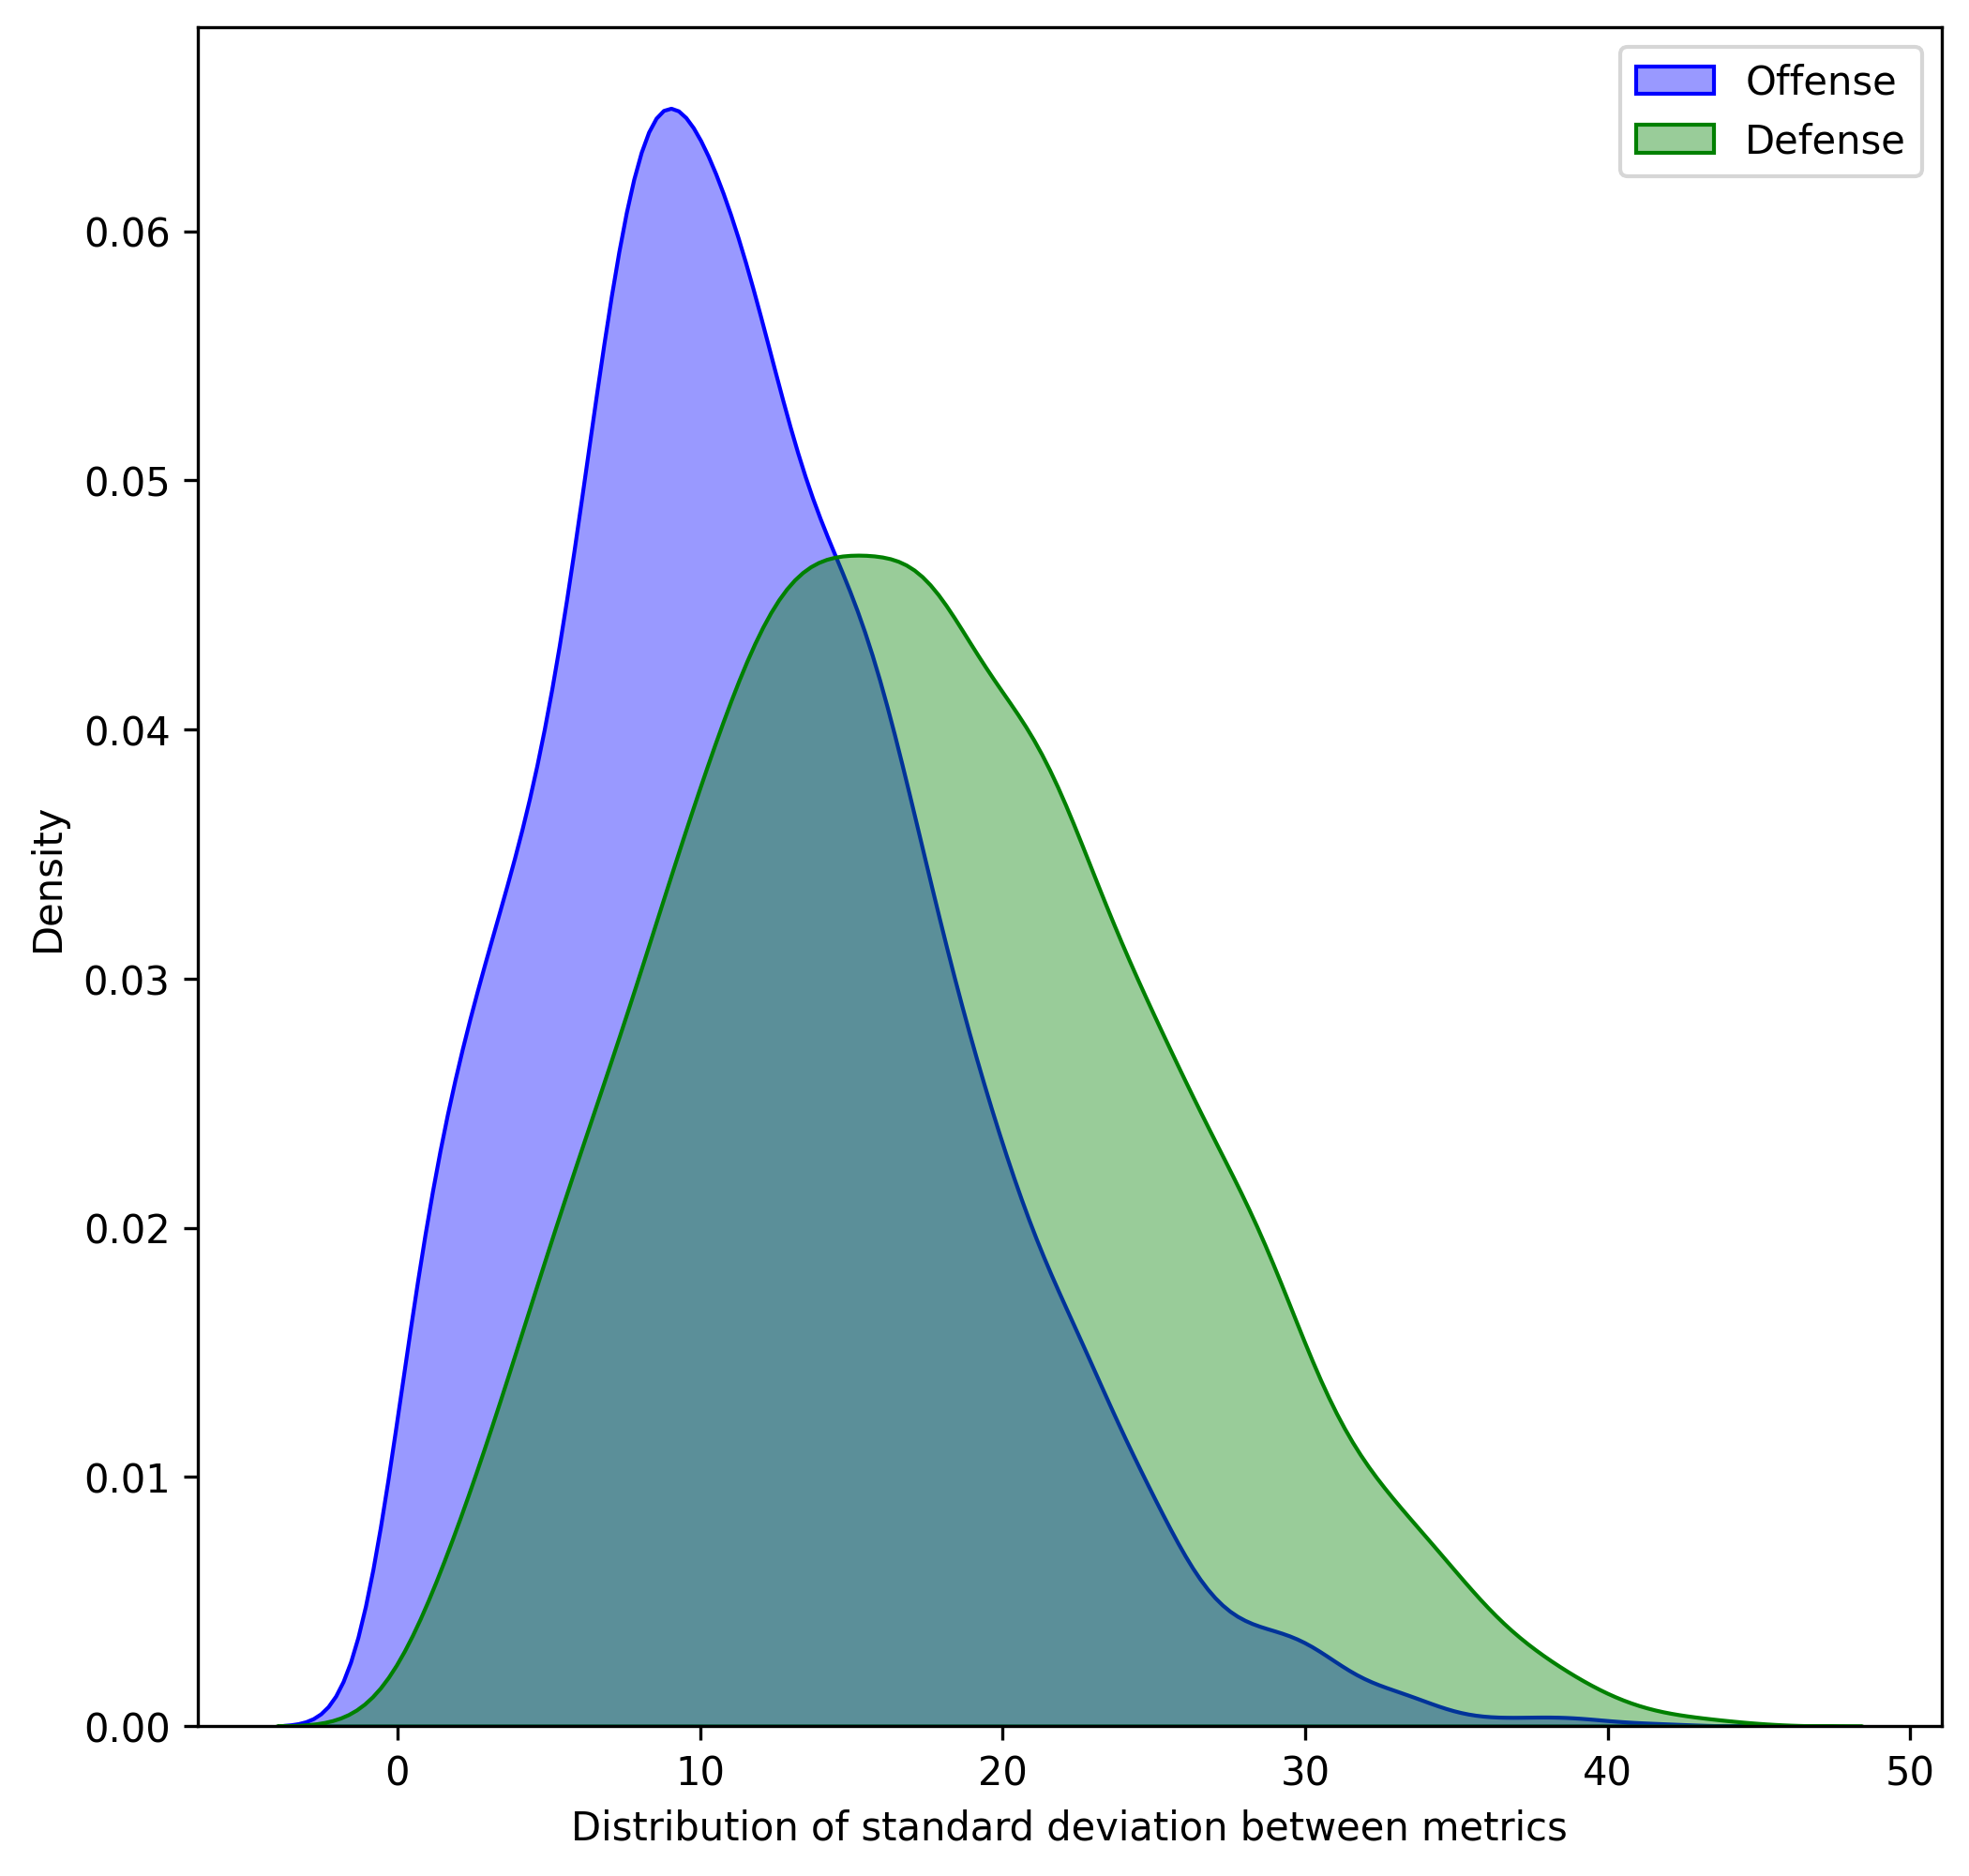

In [86]:
# Std higher for defense, as expected, harder to measure
fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

sns.kdeplot(data=no_nulls, x='std_offense', color='blue', fill=True, alpha=0.4,
            label='Offense')
sns.kdeplot(data=no_nulls, x='std_defense', color='green', fill=True, alpha=0.4,
            label='Defense')

plt.legend()

plt.xlabel('Distribution of standard deviation between metrics')

In [87]:
no_nulls.head()

,player_name_bpm,season,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_season,ORPM,DRPM,RPM,WINS,oepm,depm,epm,ewins,poss,raptor_offense,raptor_defense,raptor_total,war_reg_season,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,BPM_perc,OBPM_perc,DBPM_perc,RPM_perc,ORPM_perc,DRPM_perc,epm_perc,oepm_perc,depm_perc,raptor_total_perc,raptor_offense_perc,raptor_defense_perc,LEBRON_perc,O-LEBRON_perc,D-LEBRON_perc,std_total,std_offense,std_defense
0,Quincy Acy,2014.0,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,Quincy Acy-2014,-1.75,-0.81,-2.56,0.12,-2.241340,-0.860686,-3.102020,-0.088588,1716.0,-1.565257,-0.216477,-1.781734,0.415918,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41,47.000,32.750,79.625,24.250,31.875,42.500,22.50,29.25,34.00,43.75,42.75,52.25,22.750,27.000,40.375,12.236472,6.043075,17.939351
1,Steven Adams,2014.0,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,Steven Adams-2014,-2.65,-0.24,-2.90,-0.11,-2.226340,0.908561,-1.317780,1.332890,3078.0,-1.477308,-0.300116,-1.777424,1.087877,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82,39.000,23.500,82.750,19.000,15.250,58.250,53.25,30.00,78.25,44.00,44.75,50.25,46.250,17.500,81.125,12.963169,11.847204,14.852925
2,Jeff Adrien,2014.0,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,Jeff Adrien-2014,-0.85,-0.39,-1.25,0.99,-0.222416,-2.017500,-2.239920,0.475259,1908.0,0.164666,-2.104197,-1.939532,0.391858,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30,59.500,71.625,26.875,51.875,52.750,54.000,38.00,68.25,9.25,42.00,70.25,22.00,80.250,75.875,67.500,16.757834,8.839277,24.036691
3,Arron Afflalo,2014.0,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,Arron Afflalo-2014,0.84,-0.00,0.84,6.22,1.483060,-2.289410,-0.806353,3.702980,5047.0,1.224258,-3.023186,-1.798928,1.231904,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86,70.000,89.375,10.750,86.125,82.000,64.625,60.50,91.25,4.75,43.50,86.50,12.75,26.625,75.875,3.625,23.096503,6.178971,25.630883
5,Cole Aldrich,2014.0,C,25,NYK,46,330,19.1,0.620,0.000,0.492,12.8,33.8,23.0,6.4,1.3,8.1,19.5,13.0,0.6,0.6,1.2,0.178,-0.1,1.6,1.5,0.3,Cole Aldrich-2014,-1.55,-0.79,-2.34,0.09,-1.103380,1.572910,0.469531,0.767896,658.0,-0.508187,3.896701,3.388514,1.028737,Roll + Cut Big,Mobile Big,0.9,1.59,-0.76,2.35,88.875,69.625,93.375,30.125,36.500,43.250,77.00,53.50,87.75,91.50,59.25,95.75,91.500,50.500,96.250,26.227758,12.148817,22.627486


In [88]:
off_order =  no_nulls.groupby('Offensive Archetype').agg(avg_std_off=('std_offense', 'median')).\
             sort_values(by='avg_std_off').index.tolist()

Text(0.5, 0, 'Standard deviation of the 5 metrics on offense')

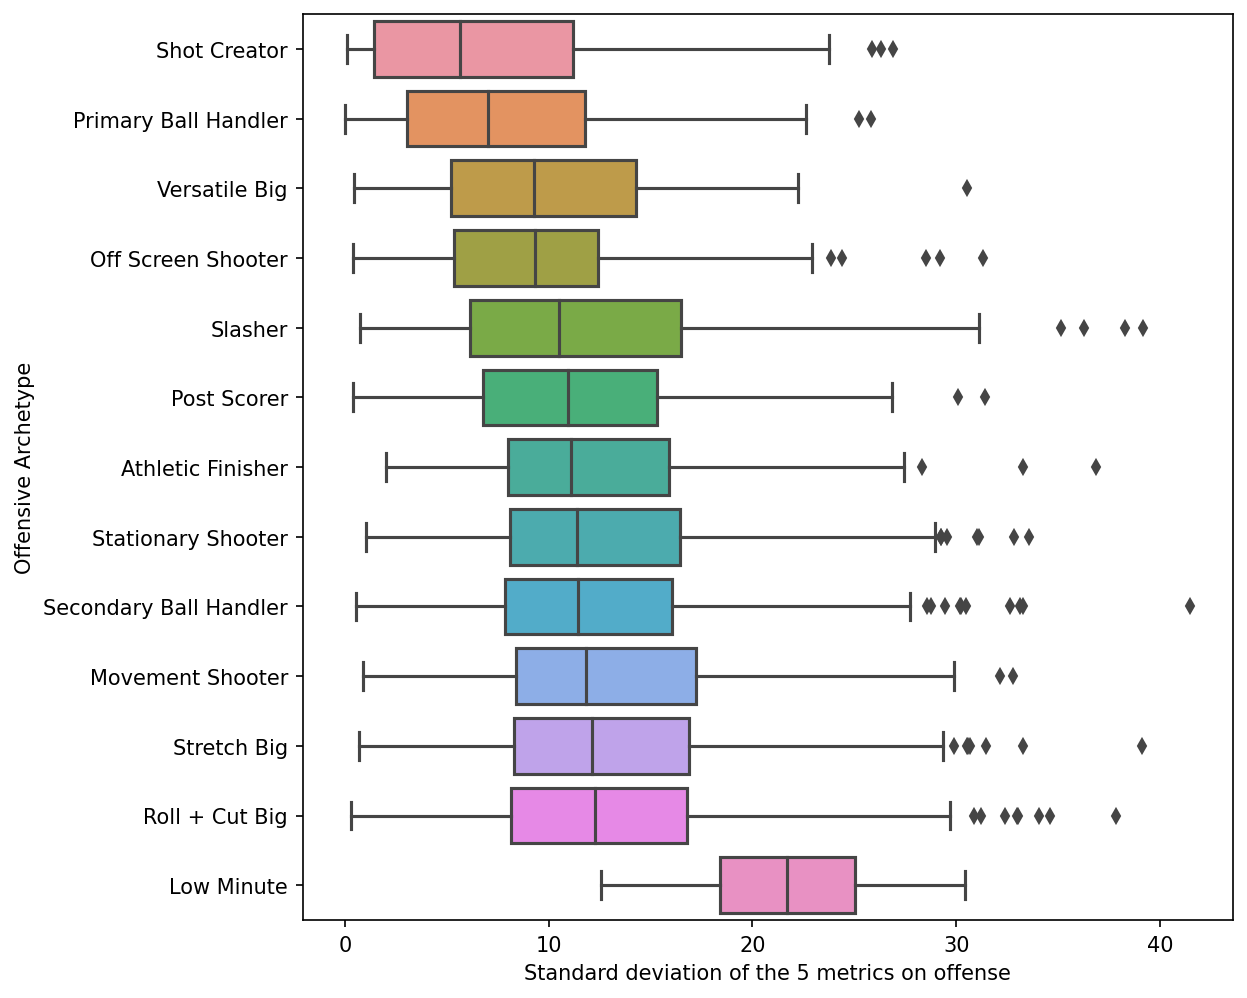

In [89]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

sns.boxplot(data=no_nulls, y='Offensive Archetype', x='std_offense', order=off_order)

plt.xlabel('Standard deviation of the 5 metrics on offense')

In [90]:
def_order =  no_nulls.groupby('Defensive Role').agg(avg_std_def=('std_defense', 'median')).\
             sort_values(by='avg_std_def').index.tolist()

Text(0.5, 0, 'Standard deviation of the 5 metrics on defense')

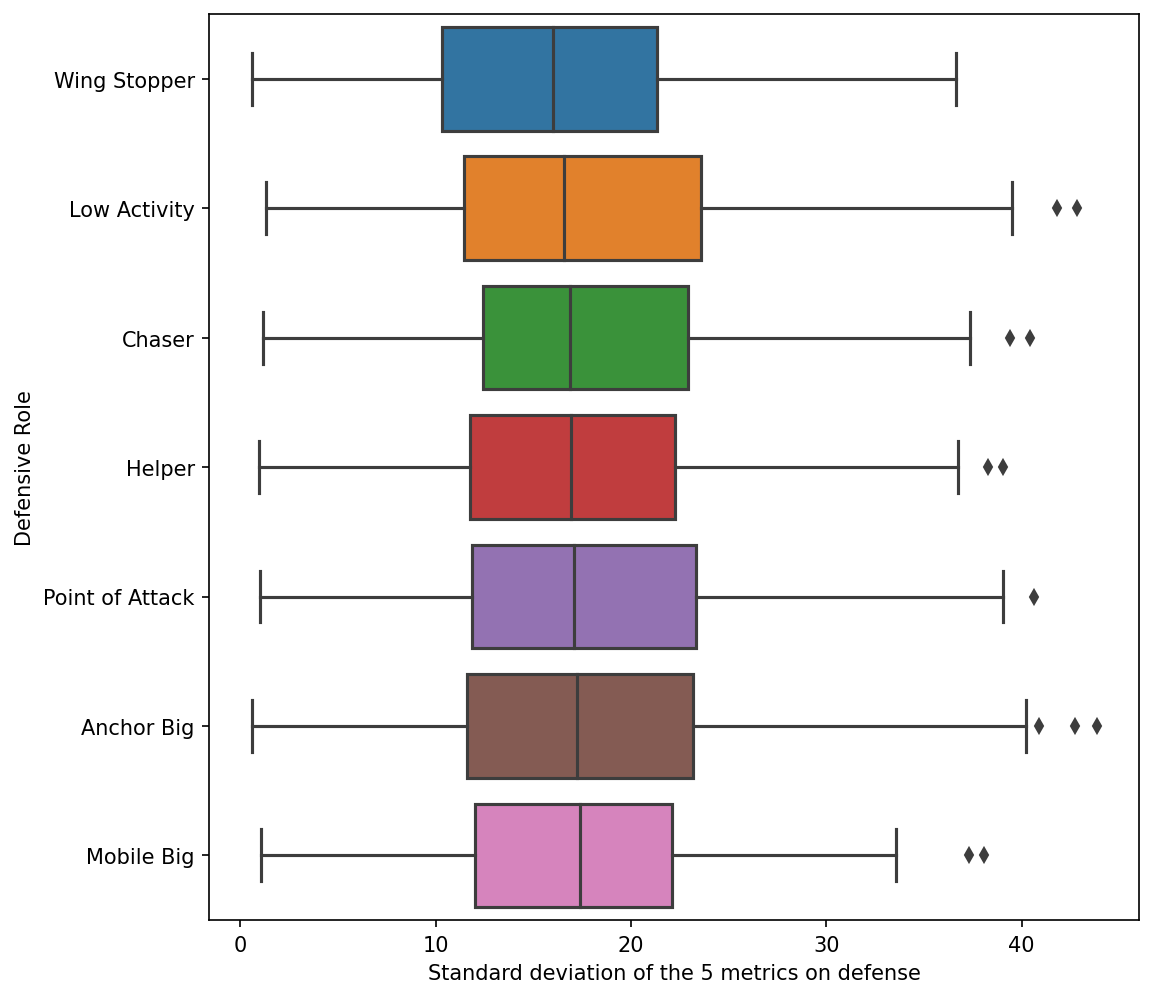

In [91]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=150)

sns.boxplot(data=no_nulls, y='Defensive Role', x='std_defense', order=def_order)

plt.xlabel('Standard deviation of the 5 metrics on defense')

In [92]:
no_nulls.columns

Index(['player_name_bpm', 'season', 'Pos', 'Age_raptor', 'Tm', 'G', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'player_season', 'ORPM', 'DRPM', 'RPM', 'WINS', 'oepm',
       'depm', 'epm', 'ewins', 'poss', 'raptor_offense', 'raptor_defense',
       'raptor_total', 'war_reg_season', 'Offensive Archetype',
       'Defensive Role', 'LEBRON WAR', 'LEBRON', 'O-LEBRON', 'D-LEBRON',
       'BPM_perc', 'OBPM_perc', 'DBPM_perc', 'RPM_perc', 'ORPM_perc',
       'DRPM_perc', 'epm_perc', 'oepm_perc', 'depm_perc', 'raptor_total_perc',
       'raptor_offense_perc', 'raptor_defense_perc', 'LEBRON_perc',
       'O-LEBRON_perc', 'D-LEBRON_perc', 'std_total', 'std_offense',
       'std_defense'],
      dtype='object')

In [93]:
no_nulls['Pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'SG-PG', 'PF-SF', 'SG-SF', 'SF-PF',
       'PG-SG', 'SF-SG', 'PF-C', 'SG-PF', 'C-PF', 'SF-C'], dtype=object)

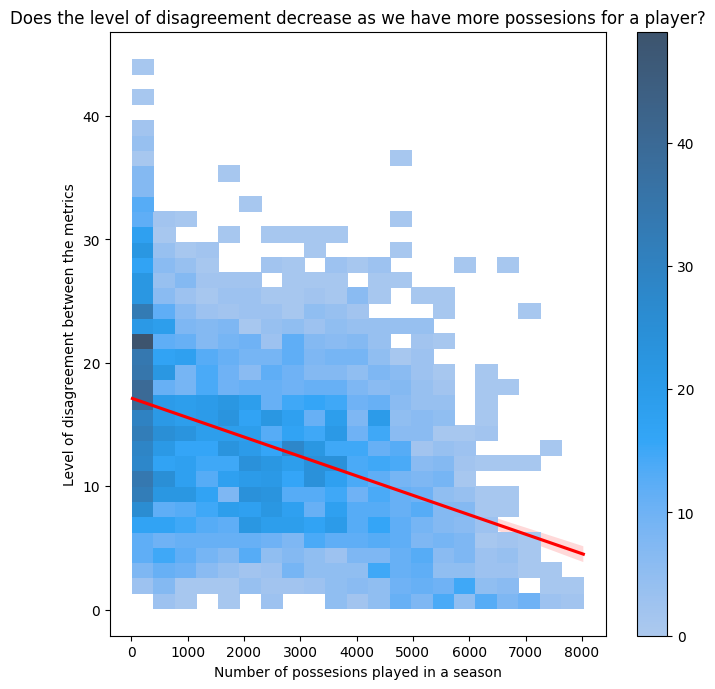

In [94]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)


sns.regplot(data=no_nulls, x='poss', y='std_total', 
            scatter=False, line_kws={'color': 'red'})

sns.histplot(data=no_nulls, x='poss', y='std_total', cbar=True)

plt.xlabel('Number of possesions played in a season')
plt.ylabel('Level of disagreement between the metrics')
plt.title('Does the level of disagreement decrease as we have more possesions for a player?')

_ = plt.show()

In [95]:
# See how quickly estimated impact stabilizes with minutes or poss played

no_nulls['poss_bin'] = pd.qcut(no_nulls.poss, q=20)

In [96]:
off_stab = no_nulls.groupby('poss_bin').agg(avg_std_off=('std_offense', np.mean)).reset_index().sort_values(by='poss_bin')

In [97]:
no_nulls.groupby('poss_bin').size()

poss_bin
(21.999, 90.0]      198
(90.0, 198.2]       193
(198.2, 338.0]      196
(338.0, 522.0]      196
(522.0, 754.0]      195
(754.0, 1002.6]     194
(1002.6, 1303.0]    197
(1303.0, 1605.8]    194
(1605.8, 1926.0]    196
(1926.0, 2200.0]    195
(2200.0, 2536.6]    195
(2536.6, 2824.2]    195
(2824.2, 3139.8]    195
(3139.8, 3464.2]    196
(3464.2, 3776.5]    195
(3776.5, 4147.4]    195
(4147.4, 4526.1]    196
(4526.1, 4961.6]    195
(4961.6, 5595.8]    195
(5595.8, 8026.0]    196
dtype: int64

In [98]:
off_stab['poss_bin'] = [int(x.mid) for x in off_stab['poss_bin']]

In [99]:
base = list(range(0, 105, 5))

x_labels = [str(base[i]) + '-' + str(base[i+1]) for i in range(len(base) - 1)]

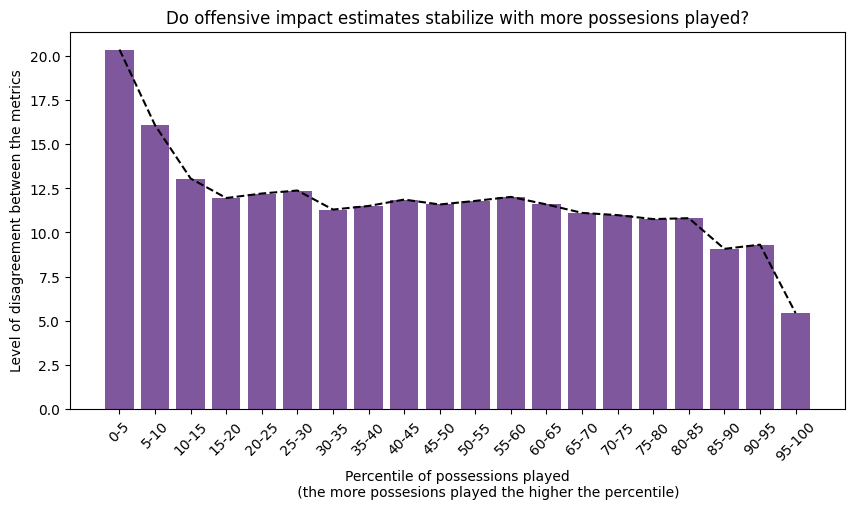

In [100]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.barplot(data=off_stab, x='poss_bin', y='avg_std_off', color='indigo',
            alpha=0.7)
sns.lineplot(x=off_stab['poss_bin'].astype(str), y=off_stab['avg_std_off'], 
             color='black', linestyle='dashed')

plt.xticks(rotation=45, ticks=[x for x in range(len(off_stab.poss_bin))],
           labels=x_labels)

plt.xlabel('''Percentile of possessions played
              (the more possesions played the higher the percentile)''')

plt.ylabel('Level of disagreement between the metrics')

plt.title('Do offensive impact estimates stabilize with more possesions played?')

_ = plt.show()

In [101]:
def_stab = no_nulls.groupby('poss_bin').agg(avg_std_def=('std_defense', np.mean)).reset_index().sort_values(by='poss_bin')

def_stab['poss_bin'] = [int(x.mid) for x in def_stab['poss_bin']]

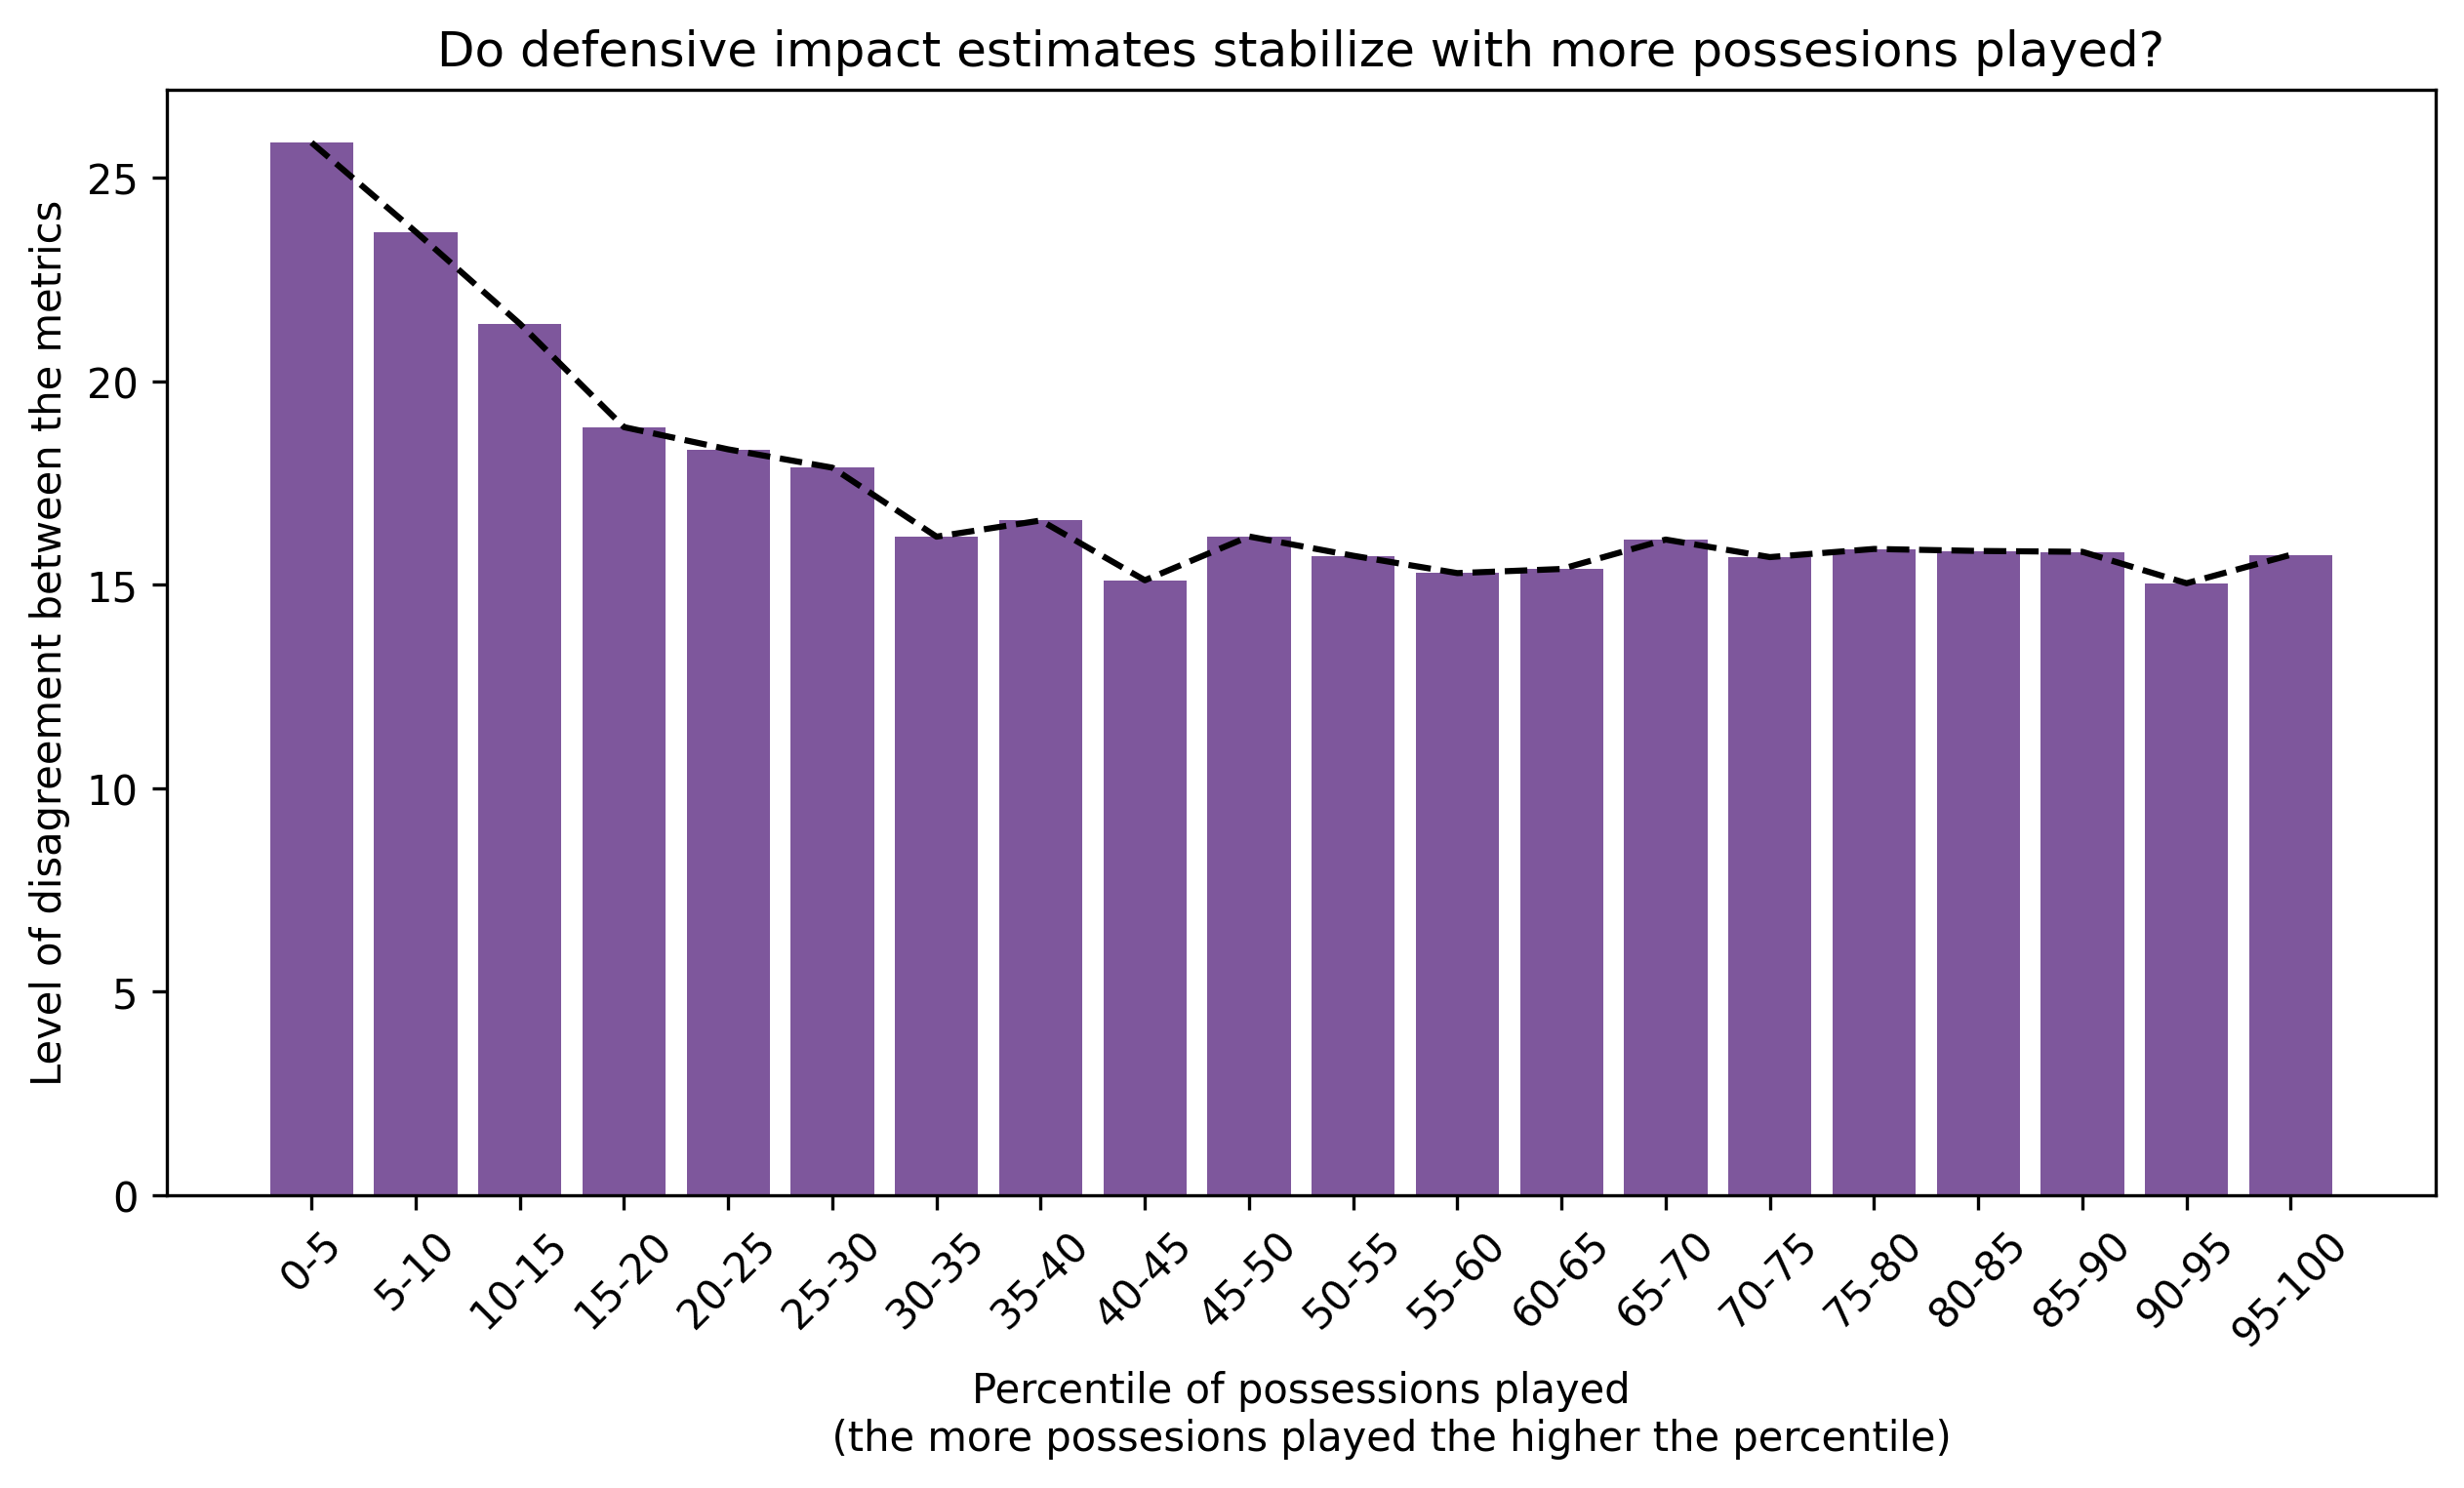

In [107]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

sns.barplot(data=def_stab, x='poss_bin', y='avg_std_def', color='indigo',
            alpha=0.7)
sns.lineplot(x=def_stab['poss_bin'].astype(str), y=def_stab['avg_std_def'], 
             color='black', linestyle='dashed')

plt.xticks(rotation=45, ticks=[x for x in range(len(off_stab.poss_bin))],
           labels=x_labels)

plt.xlabel('''Percentile of possessions played
              (the more possesions played the higher the percentile)''')

plt.ylabel('Level of disagreement between the metrics')

plt.title('Do defensive impact estimates stabilize with more possesions played?')

_ = plt.show()

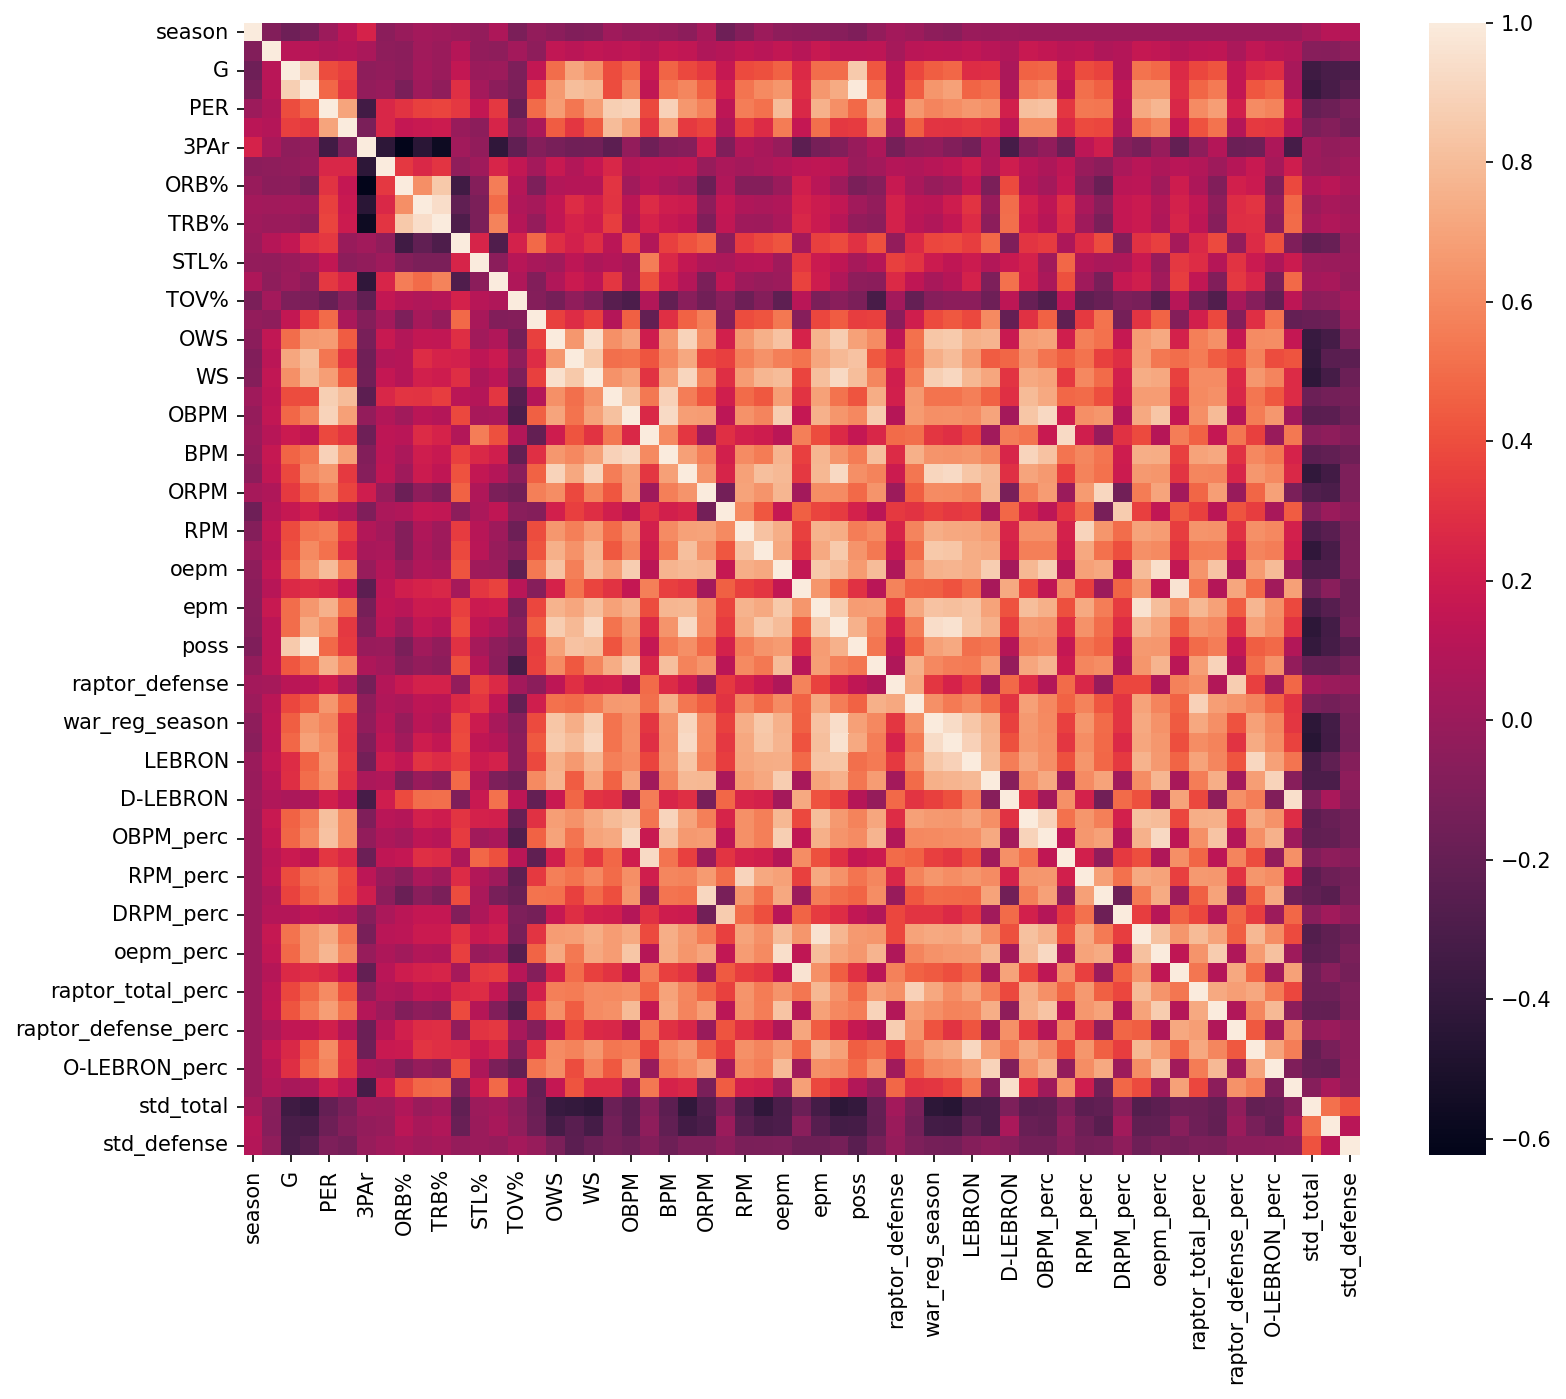

In [103]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=150)

sns.heatmap(data=no_nulls.corr())

In [104]:
no_nulls.head()

,player_name_bpm,season,Pos,Age_raptor,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,player_season,ORPM,DRPM,RPM,WINS,oepm,depm,epm,ewins,poss,raptor_offense,raptor_defense,raptor_total,war_reg_season,Offensive Archetype,Defensive Role,LEBRON WAR,LEBRON,O-LEBRON,D-LEBRON,BPM_perc,OBPM_perc,DBPM_perc,RPM_perc,ORPM_perc,DRPM_perc,epm_perc,oepm_perc,depm_perc,raptor_total_perc,raptor_offense_perc,raptor_defense_perc,LEBRON_perc,O-LEBRON_perc,D-LEBRON_perc,std_total,std_offense,std_defense,poss_bin
0,Quincy Acy,2014.0,SF,23,TOT,63,847,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,Quincy Acy-2014,-1.75,-0.81,-2.56,0.12,-2.241340,-0.860686,-3.102020,-0.088588,1716.0,-1.565257,-0.216477,-1.781734,0.415918,Roll + Cut Big,Mobile Big,0.2,-1.91,-1.50,-0.41,47.000,32.750,79.625,24.250,31.875,42.500,22.50,29.25,34.00,43.75,42.75,52.25,22.750,27.000,40.375,12.236472,6.043075,17.939351,"(1605.8, 1926.0]"
1,Steven Adams,2014.0,C,20,OKC,81,1197,11.2,0.541,0.000,0.735,14.1,17.1,15.6,4.9,1.7,3.9,22.5,11.7,0.9,1.9,2.9,0.114,-3.1,0.9,-2.2,-0.1,Steven Adams-2014,-2.65,-0.24,-2.90,-0.11,-2.226340,0.908561,-1.317780,1.332890,3078.0,-1.477308,-0.300116,-1.777424,1.087877,Roll + Cut Big,Anchor Big,1.0,-1.08,-1.90,0.82,39.000,23.500,82.750,19.000,15.250,58.250,53.25,30.00,78.25,44.00,44.75,50.25,46.250,17.500,81.125,12.963169,11.847204,14.852925,"(2824.2, 3139.8]"
2,Jeff Adrien,2014.0,PF,27,TOT,53,961,17.4,0.553,0.000,0.433,11.8,24.8,18.2,6.8,1.3,3.0,10.6,17.3,1.6,1.1,2.7,0.134,0.0,-0.9,-0.9,0.3,Jeff Adrien-2014,-0.85,-0.39,-1.25,0.99,-0.222416,-2.017500,-2.239920,0.475259,1908.0,0.164666,-2.104197,-1.939532,0.391858,Post Scorer,Anchor Big,1.7,0.38,0.08,0.30,59.500,71.625,26.875,51.875,52.750,54.000,38.00,68.25,9.25,42.00,70.25,22.00,80.250,75.875,67.500,16.757834,8.839277,24.036691,"(1605.8, 1926.0]"
3,Arron Afflalo,2014.0,SG,28,ORL,73,2552,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,Arron Afflalo-2014,0.84,-0.00,0.84,6.22,1.483060,-2.289410,-0.806353,3.702980,5047.0,1.224258,-3.023186,-1.798928,1.231904,Shot Creator,Wing Stopper,0.8,-1.78,0.08,-1.86,70.000,89.375,10.750,86.125,82.000,64.625,60.50,91.25,4.75,43.50,86.50,12.75,26.625,75.875,3.625,23.096503,6.178971,25.630883,"(4961.6, 5595.8]"
5,Cole Aldrich,2014.0,C,25,NYK,46,330,19.1,0.620,0.000,0.492,12.8,33.8,23.0,6.4,1.3,8.1,19.5,13.0,0.6,0.6,1.2,0.178,-0.1,1.6,1.5,0.3,Cole Aldrich-2014,-1.55,-0.79,-2.34,0.09,-1.103380,1.572910,0.469531,0.767896,658.0,-0.508187,3.896701,3.388514,1.028737,Roll + Cut Big,Mobile Big,0.9,1.59,-0.76,2.35,88.875,69.625,93.375,30.125,36.500,43.250,77.00,53.50,87.75,91.50,59.25,95.75,91.500,50.500,96.250,26.227758,12.148817,22.627486,"(522.0, 754.0]"


This with beautifully formatted tables

In [111]:
no_nulls.loc[no_nulls.MP > 1000, :].sort_values(by='std_total', ascending=False)\
[['player_season', 'std_total', 'LEBRON_perc', 'BPM_perc', 'RPM_perc', 'epm_perc', 'raptor_total_perc']][:10]

,player_season,std_total,LEBRON_perc,BPM_perc,RPM_perc,epm_perc,raptor_total_perc
2485,Jarrett Allen-2019,36.848616,89.819005,85.633484,21.606335,85.972851,18.325792
3235,Danuel House-2020,31.792785,84.075724,61.692650,0.668151,65.256125,64.810690
2055,Troy Daniels-2018,31.000388,2.149321,35.067873,85.294118,29.638009,20.588235
1263,Doug McDermott-2016,30.398288,5.459057,28.039702,82.133995,12.406948,22.084367
2952,Tristan Thompson-2019,30.104358,70.814480,65.610860,8.144796,83.257919,75.791855
2835,Marcus Morris-2019,29.468489,78.167421,60.407240,2.262443,67.194570,56.108597
3664,Luguentz Dort-2021,28.761016,45.474138,24.784483,84.698276,88.146552,84.698276
3073,Dillon Brooks-2020,28.244758,33.407572,20.824053,86.859688,78.173719,52.338530
1942,Jarrett Allen-2018,27.986252,62.669683,58.936652,9.502262,75.339367,23.755656
2031,Ian Clark-2018,27.979095,13.914027,23.868778,85.067873,37.104072,26.244344


In [108]:
no_nulls.columns

Index(['player_name_bpm', 'season', 'Pos', 'Age_raptor', 'Tm', 'G', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'player_season', 'ORPM', 'DRPM', 'RPM', 'WINS', 'oepm',
       'depm', 'epm', 'ewins', 'poss', 'raptor_offense', 'raptor_defense',
       'raptor_total', 'war_reg_season', 'Offensive Archetype',
       'Defensive Role', 'LEBRON WAR', 'LEBRON', 'O-LEBRON', 'D-LEBRON',
       'BPM_perc', 'OBPM_perc', 'DBPM_perc', 'RPM_perc', 'ORPM_perc',
       'DRPM_perc', 'epm_perc', 'oepm_perc', 'depm_perc', 'raptor_total_perc',
       'raptor_offense_perc', 'raptor_defense_perc', 'LEBRON_perc',
       'O-LEBRON_perc', 'D-LEBRON_perc', 'std_total', 'std_offense',
       'std_defense', 'poss_bin'],
      dtype='object')

In [112]:
no_nulls.loc[no_nulls.MP > 1000, :].sort_values(by='std_total')\
[['player_season', 'std_total', 'LEBRON_perc', 'BPM_perc', 'RPM_perc', 'epm_perc', 'raptor_total_perc']][:10]

,player_season,std_total,LEBRON_perc,BPM_perc,RPM_perc,epm_perc,raptor_total_perc
592,Stephen Curry-2015,0.108023,100.000000,99.758454,100.000000,100.000000,100.000000
1235,Kawhi Leonard-2016,0.135911,99.255583,99.503722,99.255583,99.503722,99.255583
1077,Stephen Curry-2016,0.135911,99.751861,100.000000,100.000000,100.000000,99.751861
678,James Harden-2015,0.264600,98.550725,99.275362,98.792271,98.792271,98.792271
3203,James Harden-2020,0.272772,100.000000,99.777283,99.777283,100.000000,99.331849
347,Chris Paul-2014,0.306186,99.750000,99.250000,100.000000,100.000000,99.750000
4085,Giannis Antetokounmpo-2022,0.324669,100.000000,99.589322,99.383984,99.794661,99.178645
110,Stephen Curry-2014,0.325960,99.500000,99.000000,99.750000,99.750000,99.250000
1621,James Harden-2017,0.330453,98.522167,98.645320,98.275862,98.275862,97.783251
3298,Kawhi Leonard-2020,0.337767,99.777283,99.554566,99.109131,99.777283,99.109131
